In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
import warnings
#Code to ignore warnings and to show all the rows and columns
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Reading the data from the csv file
housing_Data = pd.read_csv("train.csv")
housing_Data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [3]:
#Raw data statistical information
housing_Data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [4]:
#Raw data information
housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Raw data shape
housing_Data.shape

(1460, 81)

In [6]:
#Raw data columns
housing_Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [7]:
#Copying the dataframe to another variable for further analysis 
df = housing_Data

In [8]:
#Checking the null values in the dataframe
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#Dropping columns which has most of the data is null and the ID is not required
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

In [10]:
#New dataframe columns
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
   

In [11]:
#New dataframe shape
df.shape

(1460, 74)

In [12]:
#Numerical Columns 
numerical_Columns = df.select_dtypes(exclude='object').columns
print(numerical_Columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')


In [13]:
#Filling the null values with the median of that numerical column
for column in numerical_Columns:
    median = df[column].median()
    df[column].fillna(median, inplace=True)
#Checking the null values in the dataframe again
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [14]:
#Categorical Columns
categorical_Columns = df.select_dtypes(include ='object').columns
print(categorical_Columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')


In [15]:
#Filling the null values with the mode of that categorical column
for column in categorical_Columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)
#Checking the null values in the dataframe again
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [16]:
#After all the data cleaning, Lets check all the information
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [17]:
#Data Shape
df.shape

(1460, 74)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [19]:
#Removing Outliers
for column in numerical_Columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    main_df = df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]



In [20]:
main_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1399.000000  1399.000000    1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000   1399.000000   1399.000000  1399.000000  1399.000000   1399.000000   1399.000000   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000    1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000  1399.000000    1399.000000
mean     57.487491    69.047891   10155.280915     5.983560     5.591137  1970.080772   1984.058613    89.725518   417.333095    47.478914   559.461758  1024.273767  1132.247320   336.476054      5.690493  1474.413867      0.410293      0.058613     1.540386     0.370264      2.862044      1.048606      6.416726     0.583274  1977.609006     1.717655   458.817012    89.621158    44.892066      22.378127     3.231594    14.634024     2.482487     45.385275     6.312366  2007.819871  170237.127234
std      42.803603    21.522816    8324.834198     1.282272     1.118236    30.009463     20.661160   159.219858   428.401771   162.648530   429.378909   407.031806   357.318243   421.440524     47.292646   480.552421      0.514797      0.240995     0.537219     0.500503      0.806081      0.224874      1.544766     0.631804    23.900682     0.721365   204.278673   121.798431    65.718951      61.454480    28.563071    54.752105    38.289681    506.746349     2.703584     1.327762   59230.130817
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7442.000000     5.000000     5.000000  1953.000000   1966.000000     0.000000     0.000000     0.000000   218.000000   788.000000   870.500000     0.000000      0.000000  1119.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   312.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129000.000000
50%      50.000000    69.000000    9317.000000     6.000000     5.000000  1971.000000   1992.000000     0.000000   370.000000     0.000000   476.000000   973.000000  1069.000000     0.000000      0.000000  1437.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   471.000000     0.000000    22.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  159500.000000
75%      70.000000    78.000000   11316.500000     7.000000     6.000000  1999.000000   2003.000000   143.000000   686.000000     0.000000   807.000000  1251.500000  1346.500000   720.000000      0.000000  1728.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2000.000000     2.000000   573.000000   165.000000    64.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  203500.000000


In [21]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1399 non-null   int64  
 1   MSZoning       1399 non-null   object 
 2   LotFrontage    1399 non-null   float64
 3   LotArea        1399 non-null   int64  
 4   Street         1399 non-null   object 
 5   LotShape       1399 non-null   object 
 6   LandContour    1399 non-null   object 
 7   Utilities      1399 non-null   object 
 8   LotConfig      1399 non-null   object 
 9   LandSlope      1399 non-null   object 
 10  Neighborhood   1399 non-null   object 
 11  Condition1     1399 non-null   object 
 12  Condition2     1399 non-null   object 
 13  BldgType       1399 non-null   object 
 14  HouseStyle     1399 non-null   object 
 15  OverallQual    1399 non-null   int64  
 16  OverallCond    1399 non-null   int64  
 17  YearBuilt      1399 non-null   int64  
 18  YearRemodAdd 

In [22]:
main_df.shape

(1399, 74)

In [23]:
main_df.head(20)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0           60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2    2008       WD        Normal     208500
1           20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5    2007       WD        Normal     181500
2           60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9    2008       WD        Normal     223500
3           70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1     Detchd       1998.0          Unf     

In [24]:
#Label Encoding
label_encoder = LabelEncoder()
for column in categorical_Columns:
    main_df[column] = label_encoder.fit_transform(main_df[column])

In [25]:
main_df.head(20)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice
0           60         3         65.0     8450       1         3            3          0          4          0             5           2           2         0           5            7            5       2003          2003          1         1           12           13       196.0          2          4           2         2         3             3             2         706             5           0        150          856        1          0           1           4       856       854             0       1710             1             0         2         1             3             1            2             8           6           0           1       2003.0             1           2         548           4           4           2           0           61              0          0            0         0        0       2    2008         8              4     208500
1           20         3         80.0     9600       1         3            3          0          2          0            24           1           2         0           2            6            8       1976          1976          1         1            8            8         0.0          3          4           1         2         3             1             0         978             5           0        284         1262        1          0           1           4      1262         0             0       1262             0             1         2         0             3             1            3             6           6           1           1       1976.0             1           2         460           4           4           2         298            0              0          0            0         0        0       5    2007         8              4     181500
2           60         3         68.0    11250       1         0            3          0          4          0             5           2           2         0           5            7            5       2001          2002          1         1           12           13       162.0          2          4           2         2         3             2             2         486             5           0        434          920        1          0           1           4       920       866             0       1786             1             0         2         1             3             1            2             6           6           1           1       2001.0             1           2         608           4           4           2           0           42              0          0            0         0        0       9    2008         8              4     223500
3           70         3         60.0     9550       1         0            3          0          0          0             6           2           2         0           5            7            5       1915          1970          1         1           13           15         0.0          3          4           0         3         1             3             0         216             5           0        540          756        1          2           1           4       961       756             0  

In [26]:
main_df.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street     LotShape  LandContour    Utilities    LotConfig    LandSlope  Neighborhood   Condition1   Condition2     BldgType   HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle     RoofMatl  Exterior1st  Exterior2nd   MasVnrArea    ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF      Heating    HeatingQC   CentralAir   Electrical     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Functional   Fireplaces   GarageType  GarageYrBlt  GarageFinish   GarageCars   GarageArea   GarageQual   GarageCond   PavedDrive   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold     SaleType  SaleCondition      SalePrice
count  1399.000000  1399.000000  1399.000000    1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   1399.000000   1399.000000  1399.000000   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000   1399.000000   1399.000000  1399.000000  1399.000000   1399.000000   1399.000000  1399.000000   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000    1399.000000  1399.000000  1399.000000  1399.000000   1399.000000  1399.000000  1399.000000  1399.000000    1399.000000    1399.000000
mean     57.487491     3.030021    69.047891   10155.280915     0.995711     1.963545     2.781987     0.000715     3.017870     0.060758     12.074339     2.030021     2.007148     0.508935     3.026447     5.983560     5.591137  1970.080772   1984.058613     1.372409     1.065761     9.601144    10.313081    89.725518     2.600429     3.727663     1.375268     2.355254     2.814868      2.330236      2.802716   417.333095      4.708363    47.478914   559.461758  1024.273767     1.037169     1.595425     0.932094     3.668335  1132.247320   336.476054      5.690493  1474.413867      0.410293      0.058613     1.540386     0.370264      2.862044      1.048606     2.407434      6.416726     5.739814     0.583274     2.235883  1977.609006      1.268763     1.717655   458.817012     3.869192     3.901358     1.849893    89.621158    44.892066      22.378127     3.231594    14.634024     2.482487     45.385275     6.312366  2007.819871     7.538956       3.742673  170237.127234
std      42.803603     0.642297    21.522816    8324.834198     0.065372     1.404861     0.706857     0.026736     1.625211     0.272533      6.010379     0.877610     0.259206     1.212606     1.921570     1.282272     1.118236    30.009463     20.661160     0.808120     0.546775     3.195965     3.536532   159.219858     0.602593     0.739852     0.726557     0.778116     0.656785      1.119930      1.857504   428.401771      0.934558   162.648530   429.378909   407.031806     0.300295     1.746652     0.251674     1.071849   357.318243   421.440524     47.292646   480.552421      0.514797      0.240995     0.537219     0.500503      0.806081      0.224874     0.750661      1.544766     0.998315     0.631804     1.781353    23.900682      0.797414     0.721365   204.278673     0.597481     0.518876     0.506381   121.798431    65.718951      61.454480    28.563071    54.752105    38.289681    506.746349     2.703584     1.327762     1.564911       1.103176   59230.130817
min      20.000000     0.000000    21.000000    1300

In [27]:
main_df.shape

(1399, 74)

In [28]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1399 non-null   int64  
 1   MSZoning       1399 non-null   int32  
 2   LotFrontage    1399 non-null   float64
 3   LotArea        1399 non-null   int64  
 4   Street         1399 non-null   int32  
 5   LotShape       1399 non-null   int32  
 6   LandContour    1399 non-null   int32  
 7   Utilities      1399 non-null   int32  
 8   LotConfig      1399 non-null   int32  
 9   LandSlope      1399 non-null   int32  
 10  Neighborhood   1399 non-null   int32  
 11  Condition1     1399 non-null   int32  
 12  Condition2     1399 non-null   int32  
 13  BldgType       1399 non-null   int32  
 14  HouseStyle     1399 non-null   int32  
 15  OverallQual    1399 non-null   int64  
 16  OverallCond    1399 non-null   int64  
 17  YearBuilt      1399 non-null   int64  
 18  YearRemodAdd 

In [29]:
#Bivariate Analysis
#Correlation Heatmap for all the variables
plt.figure(figsize=(500, 200))  
main_df_Corr=main_df.corr().round(2)
sn.heatmap(main_df_Corr, annot=True, cmap='YlGnBu')
plt.title('Housing Details Correlation Matrix')
plt.show()

In [30]:
main_df.corr().round(2)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice
MSSubClass           1.00      0.03        -0.36    -0.15   -0.02      0.12        -0.01      -0.02       0.08      -0.03          0.01       -0.02       -0.04      0.75        0.40         0.07        -0.07       0.05          0.06      -0.11     -0.03        -0.09        -0.14        0.05      -0.05       0.00        0.07     -0.08     -0.01         -0.08          0.01       -0.05          0.04       -0.07      -0.14        -0.22     0.05       0.01       -0.10        0.06     -0.24      0.31          0.04       0.10          0.02         -0.01      0.15      0.18         -0.04          0.28        -0.02          0.06        0.01       -0.03        0.08         0.10         -0.01       -0.02       -0.08        0.01        0.01       -0.06        0.00         0.00          -0.01      -0.05        -0.03      0.01    -0.01   -0.02   -0.02      0.01          -0.01      -0.06
MSZoning             0.03      1.00        -0.11    -0.04    0.09      0.07        -0.02      -0.00      -0.01      -0.03         -0.25       -0.03        0.05      0.00       -0.11        -0.17         0.19      -0.31         -0.18      -0.00     -0.01        -0.01         0.00       -0.07       0.23      -0.09       -0.24      0.14     -0.01          0.04          0.02       -0.05         -0.03        0.03      -0.05        -0.09     0.06       0.14       -0.05       -0.07     -0.06     -0.06         -0.00      -0.09         -0.02          0.00     -0.21     -0.13         -0.02          0.05         0.14         -0.05       -0.10       -0.01        0.11        -0.27          0.17       -0.16       -0.20       -0.15       -0.08       -0.10       -0.01        -0.16           0.12      -0.01         0.01     -0.00     0.01   -0.03   -0.02      0.10           0.01      -0.22
LotFrontage         -0.36     -0.11         1.00     0.31   -0.04     -0.14        -0.09      -0.00      -0.19       0.06          0.06       -0.01       -0.01     -0.41        0.02         0.18        -0.04       0.09          0.06       0.13      0.08         0.07         0.11        0.14      -0.15       0.05        0.08     -0.11      0.05         -0.09         -0.02        0.19         -0.03        0.04       0.11         0.34    -0.03      -0.06        0.06        0.05      0.40      0.05          0.04       0.34          0.07         -0.00      0.15      0.03          0.24          0.00        -0.14          0.30        0.02        0.21       -0.21         0.03         -0.18        0.23        0.30        0.05        0.04        0.08        0.06         0.12           0.01       0.06         0.04      0.16     0.00    0.01    0.01     -0.02           0.05       0.30
LotArea             -0.15     -0.04         0.31     1.00   -0.24     -0.19        -0.16       0.01      -0.15       0.42         -0.00        0.03        0.03     -0.23       -0.04         0.07         0.00       0.00          0.01       0.04      0.15         0.04         0.02        0.09      -0.04       0.01       -0.02     -0.03      0.02         -0.14         -0.04        0.20         -0.07        0.06       0.01         0.25    -0.02      -0.00        0.05    

In [31]:
corr_details = main_df.corr()['SalePrice'].drop('SalePrice')

In [32]:
corr_details

MSSubClass      -0.060111
MSZoning        -0.223772
LotFrontage      0.295796
LotArea          0.249812
Street           0.044389
LotShape        -0.279036
LandContour      0.041108
Utilities       -0.014788
LotConfig       -0.078739
LandSlope        0.053655
Neighborhood     0.166051
Condition1       0.121601
Condition2      -0.003529
BldgType        -0.058484
HouseStyle       0.213829
OverallQual      0.784294
OverallCond     -0.048005
YearBuilt        0.564558
YearRemodAdd     0.541161
RoofStyle        0.110114
RoofMatl         0.082663
Exterior1st      0.120464
Exterior2nd      0.124883
MasVnrArea       0.350541
ExterQual       -0.563026
ExterCond        0.132116
Foundation       0.403240
BsmtQual        -0.528885
BsmtCond         0.053219
BsmtExposure    -0.235094
BsmtFinType1    -0.095255
BsmtFinSF1       0.290377
BsmtFinType2     0.019263
BsmtFinSF2       0.007154
BsmtUnfSF        0.222795
TotalBsmtSF      0.543508
Heating         -0.121395
HeatingQC       -0.411337
CentralAir  

In [33]:
#Model Creation
#Step-1 : Test and Train Split
#Using train_test_split from sklearn
df_train , df_test = train_test_split(main_df,train_size=0.7,test_size=0.3,random_state=100)
#Training Data Shape
print(df_train.shape)
#Test Data Shape
print(df_test.shape)

(979, 74)
(420, 74)


In [34]:
#Step-2 : Rescaling the features
#MinMax Scaling
#Creating an instance of MinMaxScaler
scaler = MinMaxScaler()
numeric_features = df_train.select_dtypes(exclude='object').columns
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
#Sample data after MinMaxScaling
df_train.head(10)

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SaleType  SaleCondition  SalePrice
162     0.000000      0.75     0.253425  0.094174     1.0       1.0          1.0        0.0        0.0        0.0      0.666667        0.25    0.285714       0.0    0.285714     0.666667        0.500   0.970803      0.916667        0.2  0.142857     0.857143     0.866667    0.141250   0.666667        1.0         0.4  0.666667       1.0      0.666667           0.2    0.212792           1.0    0.000000   0.178478     0.252209      0.2        0.0         1.0         1.0  0.276962  0.000000           0.0   0.227393      0.000000           0.0  0.666667       0.0      0.500000           0.0     0.666667           0.5         1.0    0.333333         0.2     0.954545           0.5        0.50    0.375176         1.0         1.0         1.0    0.000000     0.127971       0.000000        0.0     0.000000       0.0      0.0  0.363636    1.00      0.75            1.0   0.606156
743     0.352941      0.75     0.167808  0.100368     1.0       0.0          1.0        0.0        1.0        0.0      0.791667        0.25    0.285714       0.0    1.000000     0.444444        0.625   0.664234      0.816667        0.2  0.142857     0.428571     0.400000    0.000000   1.000000        1.0         0.2  0.666667       1.0      0.000000           0.0    0.078668           1.0    0.000000   0.039895     0.085106      0.2        0.0         1.0         1.0  0.259293  0.000000           0.0   0.212886      0.000000           0.5  0.666667       0.0      0.500000           0.0     1.000000           0.4         0.5    0.333333         0.2     0.881818           0.5        0.50    0.338505         1.0         1.0         1.0    0.414835     0.000000       0.000000        0.0     0.208333       0.0      0.0  0.818182    0.75      1.00            0.8   0.458464
1271    0.000000      0.75     0.164384  0.067554     1.0       0.0          1.0        0.0        1.0        0.0      0.583333        0.50    0.285714       0.0    0.285714     0.555556        0.750   0.700730      0.300000        0.6  0.142857     0.214286     0.200000    0.000000   1.000000        1.0         0.2  1.000000       1.0      1.000000           1.0    0.000000           1.0    0.000000   0.781627     0.243699      0.2        0.5         1.0         1.0  0.265030  0.000000           0.0   0.217596      0.000000           0.0  0.666667       0.0      0.500000           0.0     0.666667           0.5         1.0    0.333333         0.2     0.618182           0.5        0.50    0.325811         1.0         1.0         1.0    0.000000     0.000000       0.000000        0.0     0.000000       0.0      0.0  0.636364    0.75      1.00            0.8   0.493746
1110    0.235294      0.75     0.164384  0.057384     1.0       1.0          1.0        0.0        1.0        0.0      0.333333        0.25    0.285714       0.0    0.714286     0.555556        0.500   0.897810      0.766667        0.2  0.142857     0.428571     0.400000    0.000000   1.000000        1.0         0.4  0.666667       1.0      1.000000           0.4    0.038802           1.0    0.000000   0.290814     0.126514      0.2        0.5         1.0         1.0  0.100734  0.4

In [35]:
# Information of data after MinMaxScaling
df_train.info()
#Statistical information after MinMaxScaling
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 162 to 836
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     979 non-null    float64
 1   MSZoning       979 non-null    float64
 2   LotFrontage    979 non-null    float64
 3   LotArea        979 non-null    float64
 4   Street         979 non-null    float64
 5   LotShape       979 non-null    float64
 6   LandContour    979 non-null    float64
 7   Utilities      979 non-null    float64
 8   LotConfig      979 non-null    float64
 9   LandSlope      979 non-null    float64
 10  Neighborhood   979 non-null    float64
 11  Condition1     979 non-null    float64
 12  Condition2     979 non-null    float64
 13  BldgType       979 non-null    float64
 14  HouseStyle     979 non-null    float64
 15  OverallQual    979 non-null    float64
 16  OverallCond    979 non-null    float64
 17  YearBuilt      979 non-null    float64
 18  YearRemodAdd 

MSSubClass    MSZoning  LotFrontage     LotArea      Street    LotShape  LandContour   Utilities   LotConfig   LandSlope  Neighborhood  Condition1  Condition2    BldgType  HouseStyle  OverallQual  OverallCond   YearBuilt  YearRemodAdd   RoofStyle    RoofMatl  Exterior1st  Exterior2nd  MasVnrArea   ExterQual   ExterCond  Foundation    BsmtQual    BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF     Heating   HeatingQC  CentralAir  Electrical    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea     MiscVal      MoSold      YrSold    SaleType  SaleCondition   SalePrice
count  979.000000  979.000000   979.000000  979.000000  979.000000  979.000000   979.000000  979.000000  979.000000  979.000000    979.000000  979.000000  979.000000  979.000000  979.000000   979.000000   979.000000  979.000000    979.000000  979.000000  979.000000   979.000000   979.000000  979.000000  979.000000  979.000000  979.000000  979.000000  979.000000    979.000000    979.000000  979.000000    979.000000  979.000000  979.000000   979.000000  979.000000  979.000000  979.000000  979.000000  979.000000  979.000000    979.000000  979.000000    979.000000    979.000000  979.000000  979.000000    979.000000    979.000000   979.000000    979.000000  979.000000  979.000000  979.000000   979.000000    979.000000  979.000000  979.000000  979.000000  979.000000  979.000000  979.000000   979.000000     979.000000  979.000000   979.000000  979.000000  979.000000  979.000000  979.000000  979.000000     979.000000  979.000000
mean     0.223878    0.761491     0.162439    0.073141    0.996936    0.669050     0.923732    0.001021    0.760981    0.027068      0.503618    0.255107    0.286736    0.132278    0.428863     0.549086     0.576864    0.710639      0.565032    0.268846    0.151321     0.681599     0.683487    0.053641    0.869254    0.931818    0.273340    0.784814    0.937692      0.788219      0.562002    0.071551      0.940960    0.032917    0.293510     0.165547    0.207559    0.405260    0.925434    0.918539    0.181501    0.180279      0.011456    0.211902      0.133129      0.029111    0.513109    0.176200      0.471740      0.024515     0.800136      0.436466    0.951311    0.192714    0.450255     0.701514      0.640960    0.424668    0.319854    0.968080    0.976762    0.926456    0.122998     0.077645       0.042068    0.006332     0.028567    0.002974    0.008832    0.477482    0.469101    0.945225       0.758121    0.432552
std      0.256469    0.160467     0.071634    0.054550    0.055300    0.464234     0.242766    0.031960    0.404404    0.128036      0.246948    0.114763    0.042103    0.308776    0.273169     0.145527     0.140741    0.221706      0.346621    0.155735    0.075693     0.230891     0.238764    0.097154    0.204300    0.186484    0.149348    0.261957    0.219166      0.367817      0.371074    0.076079      0.188817    0.111675    0.224436     0.068851    0.061209    0.434222    0.262824    0.264780    0.081683    0.228129      0.090375    0.090060      0.170154      0.119304    0.178749    0.249448      0.132471      0.110361     0.254262      0.151233    0.178392    0.210163    0.357576     0.218429      0.395589    0.180905    0.145173    0.147196    0.127039    0.251183    0.168511     0.114326       0.112872    0.058346     0.113569    0.053697    0.058868    0.243190    0.334422    0.184948       0.207633    0.190755
min      0.000000    0.000000     0.000000    0.000000    0.000000    0.000000     0.000000    0.000000    0.000000    0.000000      0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000    0.000000      0.000000    0.000000    0.000000  

In [36]:
#Step-3 : Seperating X_train and y_train from df_train
y_train = df_train.pop('SalePrice')
X_train=  df_train

In [37]:
#Sample X_train data
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SaleType  SaleCondition
162     0.000000      0.75     0.253425  0.094174     1.0       1.0          1.0        0.0        0.0        0.0      0.666667        0.25    0.285714       0.0    0.285714     0.666667        0.500   0.970803      0.916667        0.2  0.142857     0.857143     0.866667     0.14125   0.666667        1.0         0.4  0.666667       1.0      0.666667           0.2    0.212792           1.0    0.000000   0.178478     0.252209      0.2        0.0         1.0         1.0  0.276962  0.000000           0.0   0.227393      0.000000           0.0  0.666667       0.0           0.5           0.0     0.666667           0.5         1.0    0.333333         0.2     0.954545           0.5        0.50    0.375176         1.0         1.0         1.0    0.000000     0.127971            0.0        0.0     0.000000       0.0      0.0  0.363636    1.00      0.75            1.0
743     0.352941      0.75     0.167808  0.100368     1.0       0.0          1.0        0.0        1.0        0.0      0.791667        0.25    0.285714       0.0    1.000000     0.444444        0.625   0.664234      0.816667        0.2  0.142857     0.428571     0.400000     0.00000   1.000000        1.0         0.2  0.666667       1.0      0.000000           0.0    0.078668           1.0    0.000000   0.039895     0.085106      0.2        0.0         1.0         1.0  0.259293  0.000000           0.0   0.212886      0.000000           0.5  0.666667       0.0           0.5           0.0     1.000000           0.4         0.5    0.333333         0.2     0.881818           0.5        0.50    0.338505         1.0         1.0         1.0    0.414835     0.000000            0.0        0.0     0.208333       0.0      0.0  0.818182    0.75      1.00            0.8
1271    0.000000      0.75     0.164384  0.067554     1.0       0.0          1.0        0.0        1.0        0.0      0.583333        0.50    0.285714       0.0    0.285714     0.555556        0.750   0.700730      0.300000        0.6  0.142857     0.214286     0.200000     0.00000   1.000000        1.0         0.2  1.000000       1.0      1.000000           1.0    0.000000           1.0    0.000000   0.781627     0.243699      0.2        0.5         1.0         1.0  0.265030  0.000000           0.0   0.217596      0.000000           0.0  0.666667       0.0           0.5           0.0     0.666667           0.5         1.0    0.333333         0.2     0.618182           0.5        0.50    0.325811         1.0         1.0         1.0    0.000000     0.000000            0.0        0.0     0.000000       0.0      0.0  0.636364    0.75      1.00            0.8
1110    0.235294      0.75     0.164384  0.057384     1.0       1.0          1.0        0.0        1.0        0.0      0.333333        0.25    0.285714       0.0    0.714286     0.555556        0.500   0.897810      0.766667        0.2  0.142857     0.428571     0.400000     0.00000   1.000000        1.0         0.4  0.666667       1.0      1.000000           0.4    0.038802           1.0    0.000000   0.290814     0.126514      0.2        0.5         1.0         1.0  0.100734  0.486799           0.0   0.249435      0.333333

In [38]:
#Sample y_train data
y_train.head()

162     0.606156
743     0.458464
1271    0.493746
1110    0.501131
344     0.163081
Name: SalePrice, dtype: float64

In [39]:
print(X_train.shape)
print(y_train.shape)

(979, 73)
(979,)


In [40]:
# Model Building
LR = LinearRegression()
LR.fit(X_train, y_train)
#RFE Ranking
rfe = RFE(estimator=LR, n_features_to_select=25)             
rfe = rfe.fit(X_train, y_train)

In [41]:
#Checking the RFE Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('MSZoning', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', True, 1),
 ('LotShape', False, 33),
 ('LandContour', False, 10),
 ('Utilities', True, 1),
 ('LotConfig', False, 43),
 ('LandSlope', True, 1),
 ('Neighborhood', False, 29),
 ('Condition1', False, 19),
 ('Condition2', True, 1),
 ('BldgType', False, 21),
 ('HouseStyle', False, 41),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 15),
 ('RoofStyle', False, 38),
 ('RoofMatl', False, 2),
 ('Exterior1st', False, 16),
 ('Exterior2nd', False, 17),
 ('MasVnrArea', False, 20),
 ('ExterQual', True, 1),
 ('ExterCond', False, 40),
 ('Foundation', False, 27),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 30),
 ('BsmtExposure', False, 39),
 ('BsmtFinType1', False, 28),
 ('BsmtFinSF1', False, 6),
 ('BsmtFinType2', False, 26),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 24),
 ('TotalBsmtSF', True, 1),
 ('Heating', False, 23),
 ('Heatin

In [42]:
#Columns that RFE supports
supported_columns = X_train.columns[rfe.support_]
print(supported_columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'LandSlope', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype='object')


In [43]:
#Check the shape of train and test
X_train_rfe=X_train[supported_columns]
print(X_train_rfe.shape)
print(y_train.shape)


(979, 25)
(979,)


In [44]:
Model_train=LR.fit(X_train_rfe, y_train)

In [45]:
# Print the coefficients and intercept
print(Model_train.intercept_)
print(Model_train.coef_)

-0.18155909048887353
[-0.08150704 -0.05614409 -0.14727253  0.18982911  0.15702957 -0.1486438
  0.05036078 -0.15037271  0.35282585  0.14221019  0.17585389 -0.05613602
 -0.06125911  0.05445301  0.05923165  0.71648393  0.10687384 -0.06310834
  0.06792867  0.07334552  0.07856761  0.07979523  0.08638178 -0.43771171
  0.07688369]


In [46]:
#Step-4 : Residual Analysis
#Predicting the y values with the trained model
y_train_rfe_pred = LR.predict(X_train_rfe)
y_train_rfe_pred

array([0.5671197 , 0.35866238, 0.47344197, 0.50057277, 0.19457213,
       0.26865063, 0.64102083, 0.70378709, 0.29243743, 0.33692656,
       0.60282257, 0.25621274, 0.38097429, 0.55800001, 0.56386472,
       0.42056499, 0.26209557, 0.26511258, 0.44681574, 0.50090067,
       0.263587  , 0.30249266, 0.43265485, 0.71693637, 0.16975172,
       0.44106997, 0.36598077, 0.0224643 , 0.20384544, 0.23707756,
       0.78155328, 0.40875386, 0.38659271, 0.79154702, 0.52692026,
       0.37770733, 0.65295584, 0.41505729, 0.48685877, 0.13755737,
       0.36942586, 0.55391269, 0.79613628, 0.55673455, 0.32371136,
       0.4612064 , 0.48466096, 0.46198285, 0.27336945, 0.70983173,
       0.26700152, 0.67295546, 0.32999903, 0.43035791, 0.42027527,
       0.46703678, 0.48850823, 0.24461248, 0.48378811, 0.30773709,
       0.60754734, 0.46805978, 0.1966822 , 0.33030941, 0.26129847,
       0.86607228, 0.49854458, 0.30361425, 0.465891  , 0.43185057,
       0.79348943, 0.55642891, 0.24805983, 0.5548808 , 0.34375

In [47]:
#Calculating the metrics for the training data
#R2 Score
r2_train = r2_score(y_train, y_train_rfe_pred)
print(r2_train)

0.8401918971633262


In [48]:
#RSS
rss_train = np.sum(np.square(y_train - y_train_rfe_pred))
print(rss_train)

5.687107212547561


In [49]:
#MSE
mse_train = mean_squared_error(y_train, y_train_rfe_pred)
print(mse_train)

0.00580909827635093


In [50]:
#RMSE
rmse_train = mse_train ** 0.5
print(rmse_train)

0.07621744076227521


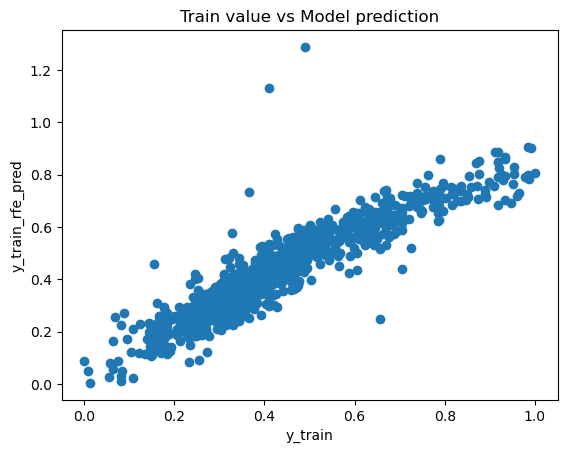

In [51]:
#This scatter plot shows the relationship between y_train and y_train_rfe_pred
plt.scatter(y_train,y_train_rfe_pred)
plt.title("Train value vs Model prediction")
plt.xlabel('y_train')
plt.ylabel('y_train_rfe_pred')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

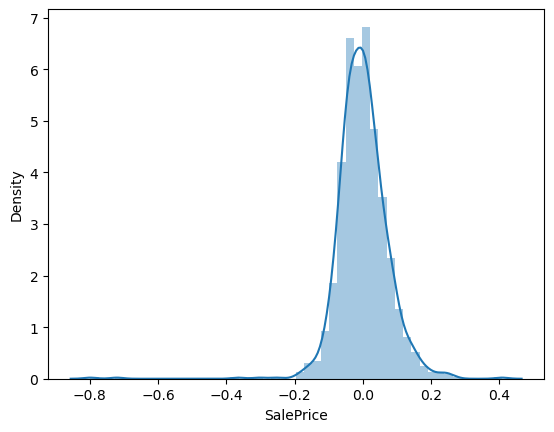

In [52]:
#Calculating Residuals
residuals_rfe = y_train-y_train_rfe_pred
#Histogram of residuals
sn.distplot(residuals_rfe)
#Residual follows a normal distribution and centered around zero

In [53]:
#Step-5 : Predicting the y values in the test dataset
#Transforming (Scaling) the test dataset
numeric_features = df_test.select_dtypes(exclude='object').columns
df_test[numeric_features] = scaler.transform(df_test[numeric_features])
df_test.head(10)

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SaleType  SaleCondition  SalePrice
138     0.235294      0.75     0.178082  0.066762     1.0  0.000000          1.0        0.0       1.00        0.0      0.208333        0.25    0.285714       0.0    0.714286     0.777778        0.500   0.927007      0.833333        0.2  0.142857     0.857143     0.866667     0.20000   0.666667        1.0         0.4  0.666667       1.0      0.666667           0.4    0.118356           1.0    0.000000   0.176378     0.164321      0.2        0.0         1.0         1.0  0.153740  0.466447           0.0   0.285983      0.000000           0.0  0.666667       0.5      0.500000           0.0     0.666667           0.5         1.0    0.666667         0.2     0.900000           0.0        0.75    0.465444         1.0         1.0         1.0    0.307692     0.193784       0.000000        0.0      0.00000       0.0      0.0  1.000000    0.50      1.00            0.8   0.638976
212     0.235294      0.25     0.174658  0.063015     1.0  1.000000          1.0        0.0       1.00        0.0      0.875000        0.25    0.285714       0.0    0.714286     0.666667        0.500   1.000000      0.983333        0.2  0.142857     0.857143     0.866667     0.00000   1.000000        1.0         0.4  0.666667       1.0      1.000000           0.4    0.145641           1.0    0.000000   0.040945     0.147300      0.2        0.0         1.0         1.0  0.137219  0.506051           0.0   0.285983      0.333333           0.0  0.666667       0.5      0.500000           0.0     0.666667           0.5         1.0    0.333333         0.2     0.990909           0.5        0.50    0.454161         1.0         1.0         1.0    0.230769     0.197441       0.000000        0.0      0.00000       0.0      0.0  0.545455    0.75      0.75            1.0   0.713406
1187    0.000000      0.75     0.232877  0.096629     1.0  1.000000          1.0        0.0       0.00        0.0      0.625000        0.25    0.285714       0.0    0.285714     0.777778        0.500   0.890511      0.750000        0.2  0.142857     0.500000     0.466667     0.00000   0.666667        1.0         0.4  0.666667       1.0      1.000000           0.4    0.257973           1.0    0.000000   0.088189     0.265794      0.2        0.0         1.0         1.0  0.296007  0.000000           0.0   0.243029      0.333333           0.0  0.666667       0.0      0.333333           0.0     0.666667           0.3         1.0    0.333333         0.2     0.854545           0.5        0.75    0.533850         1.0         1.0         1.0    0.000000     0.208410       0.347826        0.0      0.00000       0.0      0.0  0.545455    0.00      1.00            0.8   0.744001
1006    0.000000      0.75     0.164384  0.093937     1.0  0.666667          1.0        0.0       1.00        0.0      0.500000        0.50    0.285714       0.0    0.285714     0.555556        0.250   0.715328      0.333333        0.2  0.142857     0.642857     0.666667     0.00000   1.000000        1.0         0.2  0.666667       1.0      1.000000           0.6    0.219171           1.0    0.000000   0.220472     0.271195      0.2        0.5         1.0         1.0  0.303580  0.0

In [54]:
#df_test information
df_test.info()
#df_test Shape
df_test.shape

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 138 to 556
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     420 non-null    float64
 1   MSZoning       420 non-null    float64
 2   LotFrontage    420 non-null    float64
 3   LotArea        420 non-null    float64
 4   Street         420 non-null    float64
 5   LotShape       420 non-null    float64
 6   LandContour    420 non-null    float64
 7   Utilities      420 non-null    float64
 8   LotConfig      420 non-null    float64
 9   LandSlope      420 non-null    float64
 10  Neighborhood   420 non-null    float64
 11  Condition1     420 non-null    float64
 12  Condition2     420 non-null    float64
 13  BldgType       420 non-null    float64
 14  HouseStyle     420 non-null    float64
 15  OverallQual    420 non-null    float64
 16  OverallCond    420 non-null    float64
 17  YearBuilt      420 non-null    float64
 18  YearRemodAdd 

(420, 74)

In [55]:
#df_test Statistical data
df_test.describe()

MSSubClass    MSZoning  LotFrontage     LotArea      Street    LotShape  LandContour  Utilities   LotConfig   LandSlope  Neighborhood  Condition1  Condition2    BldgType  HouseStyle  OverallQual  OverallCond   YearBuilt  YearRemodAdd   RoofStyle    RoofMatl  Exterior1st  Exterior2nd  MasVnrArea   ExterQual   ExterCond  Foundation    BsmtQual    BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF     Heating   HeatingQC  CentralAir  Electrical    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea     MiscVal      MoSold      YrSold    SaleType  SaleCondition   SalePrice
count  420.000000  420.000000   420.000000  420.000000  420.000000  420.000000   420.000000      420.0  420.000000  420.000000    420.000000  420.000000  420.000000  420.000000  420.000000   420.000000   420.000000  420.000000    420.000000  420.000000  420.000000   420.000000   420.000000  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000    420.000000    420.000000  420.000000    420.000000  420.000000  420.000000   420.000000  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000    420.000000  420.000000    420.000000    420.000000  420.000000  420.000000    420.000000    420.000000   420.000000    420.000000  420.000000  420.000000   420.00000   420.000000    420.000000  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000   420.000000     420.000000  420.000000   420.000000  420.000000  420.000000  420.000000  420.000000  420.000000     420.000000  420.000000
mean     0.212675    0.748214     0.169463    0.083812    0.992857    0.620635     0.935714        0.0    0.739286    0.038095      0.501885    0.250595    0.286735    0.115476    0.440476     0.564550     0.566964    0.728224      0.573730    0.287619    0.154422     0.695578     0.696984    0.061760    0.861111    0.932143    0.279048    0.785714    0.939683      0.750000      0.557143    0.079518      0.943333    0.030565    0.294079     0.172516    0.207143    0.383929    0.947619    0.913690    0.187054    0.196273      0.009195    0.221714      0.145238      0.029762    0.514286    0.205952      0.489286      0.023810     0.807937      0.453810    0.969048    0.198413     0.44000     0.714913      0.619048    0.440476    0.332218    0.965476    0.972024    0.921429    0.123358     0.092383       0.036978    0.006430     0.034965    0.009001    0.022605    0.495671    0.422024    0.935714       0.726190    0.466796
std      0.240632    0.160631     0.078198    0.104258    0.084313    0.476438     0.218101        0.0    0.410779    0.153639      0.258668    0.096938    0.020912    0.289636    0.277769     0.134640     0.137429    0.212472      0.339338    0.174068    0.083529     0.222049     0.228635    0.104703    0.192737    0.181587    0.135524    0.253550    0.218628      0.384929      0.372915    0.075290      0.182605    0.107293    0.227886     0.060895    0.057360    0.442463    0.223060    0.275528    0.082673    0.240095      0.087748    0.091366      0.174831      0.123377    0.180035    0.251179      0.138001      0.117267     0.240746      0.161318    0.133670    0.211816     0.35353     0.214539      0.405945    0.178745    0.141228    0.154483    0.135859    0.258078    0.164660     0.132291       0.107700    0.051013     0.115230    0.106793    0.248435    0.251548    0.324088    0.218556       0.247141    0.200822
min      0.000000    0.000000     0.000000   -0.001557    0.000000    0.000000     0.000000        0.0    0.000000    0.000000      0.000000    0.000000    0.285714    0.000000    0.000000     0.222222     0.125000    0.058394      0.000000    0.000000    0.142857     0.

In [56]:
#Seperating X_test and y_test from df_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [57]:
print(X_test.shape)
print(y_test.shape)

(420, 73)
(420,)


In [58]:
#Check the shape of train and test
X_test_rfe=X_test[supported_columns]
print(X_test_rfe.shape)
print(y_test.shape)

(420, 25)
(420,)


In [59]:
#Prediction in test data
Model_test_pred=LR.predict(X_test_rfe)
print(Model_test_pred)

[ 0.67340199  0.6458138   0.67563106  0.46129394  0.3448287   0.72133102
  0.32027456  0.68684101  0.37095964  0.53241742  0.82783626  0.60109757
  0.6086071   0.38230074  0.66247505  0.39255912  0.56600271  0.82464846
  0.58840145  0.60835013  0.37079258  0.24898532  0.3847791   0.29710756
  0.59803991  0.70118955  0.41002885  0.18297081  0.3493497   0.39279776
  0.5614857   0.26782394  0.5089523   0.3281089   0.67646341  0.5538849
  0.15388863  0.31486622  0.49470622  0.40242865  0.3571096   0.3369248
  0.36132119  0.43317028  0.52023418  0.43713411  0.55365019  0.37852712
  0.43944842  0.32043947  0.49071394  0.3938944   0.28905191  0.62833866
  0.51023768  0.53945141  0.82218333  0.47860331  0.36209     0.59521596
  0.30688928  0.25951807  0.53544074  0.50331526  0.77840062  0.59339666
  0.15224097  0.45176113  0.53962788  0.50179199  0.59163281  0.34867015
  0.28314671  0.42551562  0.46409699  0.41115597  0.19830063  0.36663716
  0.75457677  0.54383853  0.19568562  0.32625589  0.3

In [60]:
#Calculating the metrics for the test data
#R2 Score
r2_test = r2_score(y_test, Model_test_pred)
print(r2_test)

0.7707043403827356


In [61]:
#RSS
rss_test = np.sum(np.square(y_test - Model_test_pred))
print(rss_test)

3.874646547576938


In [62]:
#MSE
mse_test = mean_squared_error(y_test, Model_test_pred)
print(mse_test)

0.009225348922802233


In [63]:
#RMSE
rmse_test = mse_test ** 0.5
print(rmse_test)

0.09604867996387162


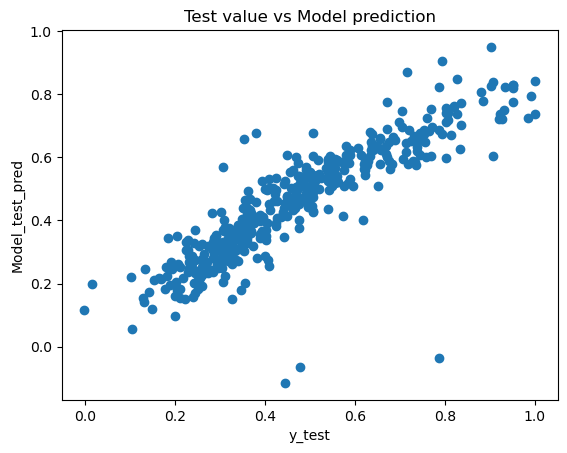

In [64]:
#This scatter plot shows the relationship between y_test and Model_test_pred
plt.scatter(y_test,Model_test_pred)
plt.title("Test value vs Model prediction")
plt.xlabel('y_test')
plt.ylabel('Model_test_pred')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

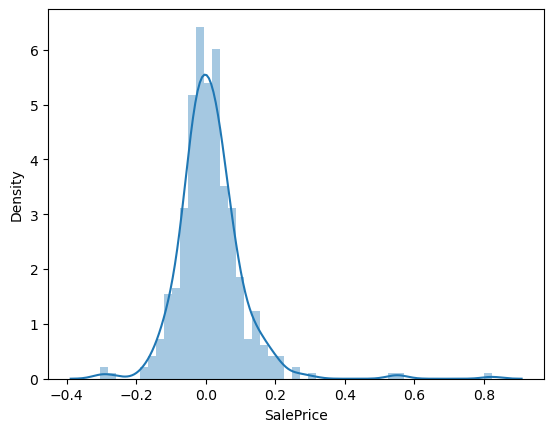

In [65]:
#Calculating Residuals
residuals_rfe_test = y_test-Model_test_pred
#Histogram of residuals
sn.distplot(residuals_rfe_test)
#Residual follows a normal distribution and centered around zero

In [66]:
#Ridge and Lasso Regression
#Data for Ridge and Lasso Regression
X_train_RaL = X_train[supported_columns]
X_test_RaL = X_test[supported_columns]
y_train_RaL = y_train
y_test_RaL = y_test
print(X_train_RaL.shape)
print(X_test_RaL.shape)
print(y_train_RaL.shape)
print(y_test_RaL.shape)

(979, 25)
(420, 25)
(979,)
(420,)


In [67]:
#Ridge Regression
#Check for the optimal lambda (Hyperparameter) value using Grid Search Cross Validation
alphas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Creating a Ridge Regression Object
ridge = Ridge()
#GSCV
folds = 5
RR = GridSearchCV(estimator = ridge, 
                        param_grid = alphas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
RR.fit(X_train_RaL, y_train_RaL) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
#Printing the best Hyperparameter Alpha
print(RR.best_params_)

{'alpha': 0.3}


In [69]:
#Fitting the model
RR = Ridge(alpha=0.3)
RR.fit(X_train_RaL,y_train_RaL)

Ridge(alpha=0.3)

In [70]:
#Printing the feature coefficients
print(RR.coef_)

[-0.07752867 -0.05653256 -0.12471239  0.1680739   0.14707953 -0.11255154
  0.05339083 -0.12380287  0.35657589  0.14120028  0.17137665 -0.05814528
 -0.062336    0.05253304  0.0604842   0.66326187  0.10357499 -0.06316235
  0.06441332  0.07960731  0.08723693  0.07657681  0.08072033 -0.37704472
  0.06288497]


In [71]:
#Predicting the y values with the trained model
y_train_rr_pred = RR.predict(X_train_RaL)
y_train_rr_pred

array([0.56862315, 0.36048794, 0.4736967 , 0.49882533, 0.19619442,
       0.27058703, 0.6349234 , 0.70426229, 0.29093809, 0.33843472,
       0.59926927, 0.25528197, 0.38668757, 0.55914374, 0.56698287,
       0.42161511, 0.25972289, 0.25982149, 0.44691412, 0.4900093 ,
       0.26466235, 0.30169202, 0.43324188, 0.71870559, 0.17120222,
       0.44547656, 0.36766147, 0.04809842, 0.20756839, 0.2567439 ,
       0.77480346, 0.40990481, 0.38618219, 0.78380558, 0.5272407 ,
       0.37925856, 0.65056737, 0.41972382, 0.48607572, 0.13966438,
       0.37613783, 0.56146111, 0.79787381, 0.55503057, 0.31769547,
       0.45854568, 0.48519557, 0.45959027, 0.27187085, 0.70846128,
       0.27191131, 0.67333891, 0.3325735 , 0.42983166, 0.4204128 ,
       0.46301166, 0.49067467, 0.23913543, 0.48207013, 0.3049145 ,
       0.59722952, 0.46811237, 0.19809956, 0.32976421, 0.26007498,
       0.86852056, 0.49982404, 0.30578712, 0.46805658, 0.43843246,
       0.7932604 , 0.55324369, 0.29957117, 0.5529725 , 0.34693

In [72]:
#Calculating the metrics for the training data
#R2 Score
r2_rr_train = r2_score(y_train_RaL, y_train_rr_pred)
print(r2_rr_train)

0.8395689885615101


In [73]:
#RSS
rss_rr_train = np.sum(np.square(y_train_RaL - y_train_rr_pred))
print(rss_rr_train)

5.709274724327402


In [74]:
#MSE
mse_rr_train = mean_squared_error(y_train_RaL, y_train_rr_pred)
print(mse_rr_train)

0.0058317412914478065


In [75]:
#RMSE
rmse_rr_train = mse_rr_train ** 0.5
print(rmse_rr_train)

0.07636583851073599


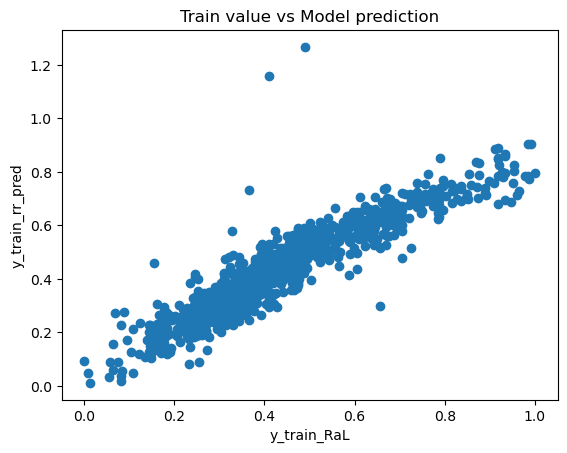

In [76]:
#This scatter plot shows the relationship between y_train_RaL and y_train_rr_pred
plt.scatter(y_train_RaL,y_train_rr_pred)
plt.title("Train value vs Model prediction")
plt.xlabel('y_train_RaL')
plt.ylabel('y_train_rr_pred')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

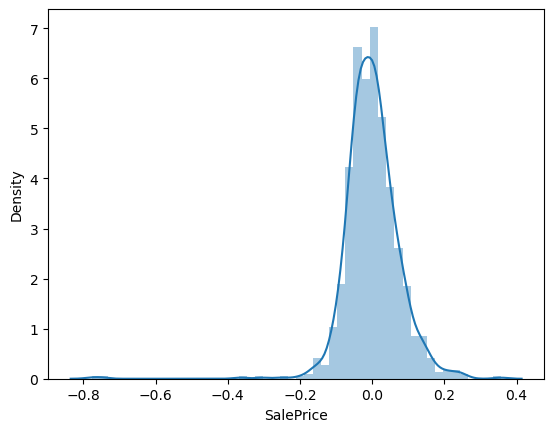

In [77]:
#Calculating Residuals
residuals_rr_train = y_train_RaL-y_train_rr_pred
#Histogram of residuals
sn.distplot(residuals_rr_train)
#Residual follows a normal distribution and centered around zero

In [78]:
#Prediction in test data
y_test_rr_pred=RR.predict(X_test_RaL)
print(y_test_rr_pred)

[ 0.67608657  0.64194443  0.67713553  0.45832145  0.34247568  0.72304599
  0.31916375  0.68947466  0.37311077  0.53755107  0.82171168  0.59150404
  0.60663074  0.38341944  0.66043604  0.39469665  0.56544474  0.81579481
  0.58630536  0.60400381  0.36640487  0.25481657  0.3873722   0.29829834
  0.60142435  0.7012093   0.41635402  0.18553794  0.34861725  0.39395943
  0.55708926  0.27379923  0.51263188  0.32479534  0.61547516  0.55930844
  0.16067442  0.31650068  0.49575756  0.40523279  0.35528733  0.34367579
  0.36146058  0.436655    0.51733393  0.43570926  0.55389708  0.37974023
  0.44079592  0.3229048   0.48954771  0.40269135  0.29443896  0.62635907
  0.50839819  0.53808806  0.82055588  0.48090331  0.36245729  0.59604652
  0.3074233   0.2631807   0.53599947  0.50568887  0.77595878  0.59293807
  0.15295435  0.46001944  0.53708959  0.49523869  0.5889857   0.34956254
  0.28145049  0.42349216  0.46113652  0.40343238  0.19754944  0.36464403
  0.75525142  0.54856965  0.19647394  0.32619763  0

In [79]:
#Calculating the metrics for the test data
#R2 Score
r2_rr_test = r2_score(y_test_RaL, y_test_rr_pred)
print(r2_rr_test)

0.7880966364283017


In [80]:
#RSS
rss_rr_test= np.sum(np.square(y_test_RaL - y_test_rr_pred))
print(rss_rr_test)

3.5807508849208154


In [81]:
#MSE
mse_rr_test = mean_squared_error(y_test_RaL, y_test_rr_pred)
print(mse_rr_test)

0.008525597345049561


In [82]:
#RMSE
rmse_rr_test = mse_rr_test ** 0.5
print(rmse_rr_test)

0.09233416131123715


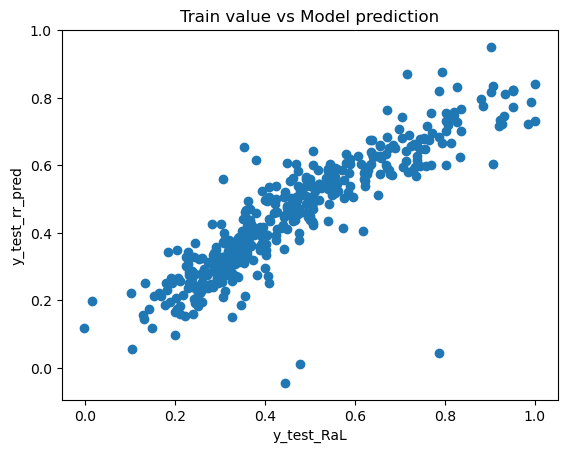

In [83]:
#This scatter plot shows the relationship between y_test_RaL and y_test_rr_pred
plt.scatter(y_test_RaL,y_test_rr_pred)
plt.title("Train value vs Model prediction")
plt.xlabel('y_test_RaL')
plt.ylabel('y_test_rr_pred')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

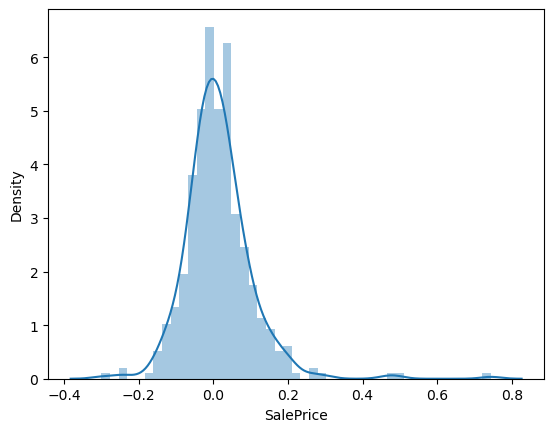

In [84]:
#Calculating Residuals
residuals_rr_test = y_test_RaL-y_test_rr_pred
#Histogram of residuals
sn.distplot(residuals_rr_test)
#Residual follows a normal distribution and centered around zero

In [85]:
#Lasso Regression
#Check for the optimal lambda (Hyperparameter) value using Grid Search Cross Validation
alphas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Creating a Lasso Regression Object
lasso = Lasso()
#GSCV
folds = 5
LSR = GridSearchCV(estimator = lasso, 
                        param_grid = alphas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
LSR.fit(X_train_RaL, y_train_RaL) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
#Printing the best Hyperparameter Alpha
print(LSR.best_params_)

{'alpha': 0.0001}


In [87]:
#Fitting the model
LSR = Lasso(alpha=0.0001)
LSR.fit(X_train_RaL,y_train_RaL)

Lasso(alpha=0.0001)

In [88]:
#Printing the feature coefficients
print(LSR.coef_)

[-0.07845655 -0.05161503 -0.09819075  0.13681601  0.12316723 -0.04253168
  0.05105027 -0.08478442  0.36022702  0.13727966  0.17357095 -0.05605566
 -0.06212419  0.0455783   0.03064879  0.69465934  0.10718306 -0.06133409
  0.06159285  0.07767218  0.08521579  0.07059963  0.07602641 -0.38202687
  0.03809795]


In [89]:
#Predicting the y values with the trained model
y_train_lsr_pred = LSR.predict(X_train_RaL)
y_train_lsr_pred

array([0.56814267, 0.36172917, 0.47071689, 0.50372577, 0.19771946,
       0.26903609, 0.63972706, 0.70069453, 0.29082142, 0.33792637,
       0.602044  , 0.25461434, 0.38750036, 0.55722499, 0.57073021,
       0.42567963, 0.26480969, 0.26326247, 0.4485313 , 0.49550408,
       0.26500944, 0.30209129, 0.43248795, 0.71619436, 0.16970282,
       0.44616183, 0.3665075 , 0.07362367, 0.2041122 , 0.27832764,
       0.78263347, 0.40986765, 0.38993171, 0.7896523 , 0.53021552,
       0.37748   , 0.65590786, 0.41692517, 0.48735287, 0.14295905,
       0.37729509, 0.5574799 , 0.79429663, 0.54920537, 0.32299319,
       0.4592932 , 0.48499183, 0.46526239, 0.27371354, 0.71217854,
       0.26798703, 0.66937398, 0.32879588, 0.43049963, 0.41833026,
       0.46463311, 0.48815414, 0.24244454, 0.47998025, 0.30626266,
       0.60965158, 0.46773183, 0.199862  , 0.32788862, 0.26010345,
       0.86487397, 0.49735996, 0.30525561, 0.46999447, 0.43739932,
       0.78876907, 0.56043835, 0.30638627, 0.55604378, 0.34555

In [90]:
#Calculating the metrics for the training data
#R2 Score
r2_lsr_train = r2_score(y_train_RaL, y_train_lsr_pred)
print(r2_lsr_train)

0.8388608720552193


In [91]:
#RSS
rss_lsr_train = np.sum(np.square(y_train_RaL - y_train_lsr_pred))
print(rss_lsr_train)

5.734474538471785


In [92]:
#MSE
mse_lsr_train = mean_squared_error(y_train_RaL, y_train_lsr_pred)
print(mse_lsr_train)

0.005857481653188749


In [93]:
#RMSE
rmse_lsr_train = mse_lsr_train ** 0.5
print(rmse_lsr_train)

0.07653418617316544


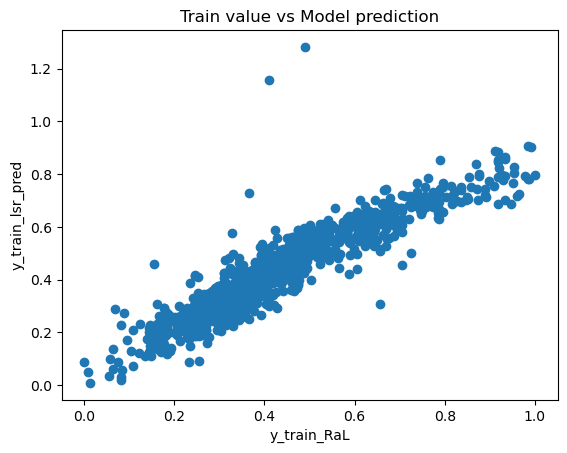

In [94]:
#This scatter plot shows the relationship between y_train_RaL and y_train_lsr_pred
plt.scatter(y_train_RaL,y_train_lsr_pred)
plt.title("Train value vs Model prediction")
plt.xlabel('y_train_RaL')
plt.ylabel('y_train_lsr_pred')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

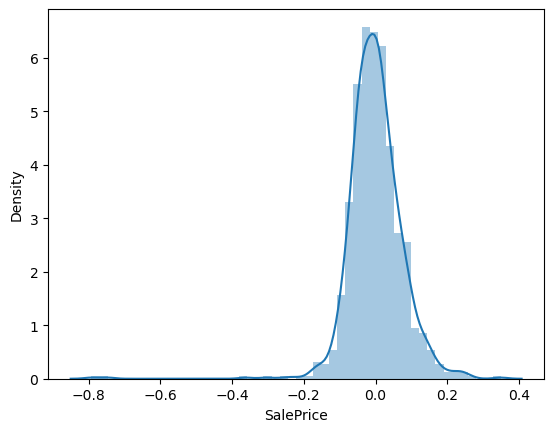

In [95]:
#Calculating Residuals
residuals_lsr_train = y_train_RaL-y_train_lsr_pred
#Histogram of residuals
sn.distplot(residuals_lsr_train)
#Residual follows a normal distribution and centered around zero

In [96]:
#Prediction in test data
y_test_lsr_pred=LSR.predict(X_test_RaL)
print(y_test_lsr_pred)

[ 0.67732791  0.64413265  0.6760975   0.45569126  0.34121819  0.72042119
  0.31809065  0.69041581  0.36807945  0.53837019  0.82792733  0.59541851
  0.60004191  0.38528915  0.66180937  0.39173887  0.56281783  0.81768587
  0.58604428  0.60639979  0.36298548  0.2578644   0.38731208  0.30118859
  0.59916521  0.7021114   0.41395727  0.18726509  0.34896094  0.3932583
  0.56023874  0.27164411  0.51306525  0.32619925  0.50300207  0.55959052
  0.16004548  0.31524267  0.49279487  0.40824077  0.36036727  0.33896602
  0.35980818  0.4321245   0.52247506  0.43335828  0.5526682   0.37894253
  0.43777708  0.32068148  0.49380522  0.40320026  0.29367579  0.62509657
  0.51056698  0.53582356  0.81593854  0.47701613  0.36002785  0.59236633
  0.31114963  0.26040247  0.53063749  0.5084691   0.77839886  0.59178958
  0.15264435  0.45255164  0.53946175  0.48220236  0.58856779  0.34572564
  0.28366341  0.42699037  0.46632232  0.40854093  0.19469104  0.36347192
  0.75858097  0.54856267  0.1985041   0.33546652  0.

In [97]:
#Calculating the metrics for the test data
#R2 Score
r2_lsr_test = r2_score(y_test_RaL, y_test_lsr_pred)
print(r2_lsr_test)

0.7920774945655951


In [98]:
#RSS
rss_lsr_test= np.sum(np.square(y_test_RaL - y_test_lsr_pred))
print(rss_lsr_test)

3.513482196696174


In [99]:
#MSE
mse_lsr_test = mean_squared_error(y_test_RaL, y_test_lsr_pred)
print(mse_lsr_test)

0.008365433801657557


In [100]:
#RMSE
rmse_lsr_test = mse_lsr_test ** 0.5
print(rmse_lsr_test)

0.09146274543035299


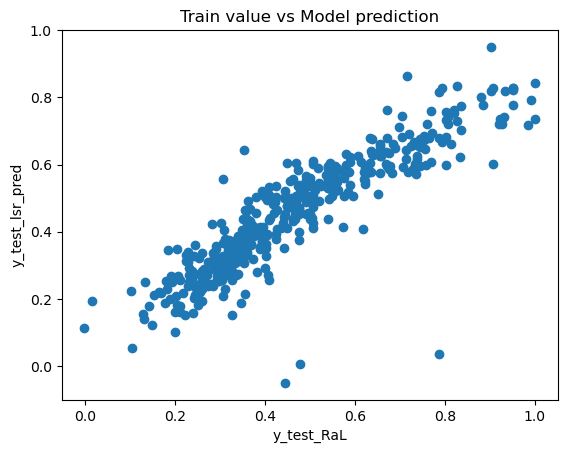

In [101]:
#This scatter plot shows the relationship between y_test_RaL and y_test_lsr_pred
plt.scatter(y_test_RaL,y_test_lsr_pred)
plt.title("Train value vs Model prediction")
plt.xlabel('y_test_RaL')
plt.ylabel('y_test_lsr_pred')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

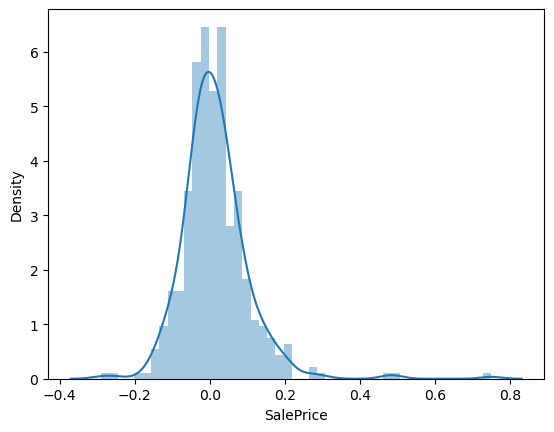

In [102]:
#Calculating Residuals
residuals_lsr_test = y_test_RaL-y_test_lsr_pred
#Histogram of residuals
sn.distplot(residuals_lsr_test)
#Residual follows a normal distribution and centered around zero

In [103]:
#Metrics Visualisation
metrics_data = {
    'Metric': ['R2 Score Train', 'R2 Score Test', 'RSS Train', 'RSS Test', 'MSE Train', 'MSE Test', 'RMSE Train', 'RMSE Test'],
    'Linear Regression': [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test, rmse_train, rmse_test],
    'Ridge Regression': [r2_rr_train, r2_rr_test, rss_rr_train, rss_rr_test, mse_rr_train, mse_rr_test, rmse_rr_train, rmse_rr_test],
    'Lasso Regression': [r2_lsr_train, r2_lsr_test, rss_lsr_train, rss_lsr_test, mse_lsr_train, mse_lsr_test, rmse_lsr_train, rmse_lsr_test]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set the 'Metric' column as the index
metrics_df.set_index('Metric', inplace=True)

print(metrics_df)

                Linear Regression  Ridge Regression  Lasso Regression
Metric                                                               
R2 Score Train           0.840192          0.839569          0.838861
R2 Score Test            0.770704          0.788097          0.792077
RSS Train                5.687107          5.709275          5.734475
RSS Test                 3.874647          3.580751          3.513482
MSE Train                0.005809          0.005832          0.005857
MSE Test                 0.009225          0.008526          0.008365
RMSE Train               0.076217          0.076366          0.076534
RMSE Test                0.096049          0.092334          0.091463


In [104]:
#Changes in the coefficients
betas = pd.DataFrame(index=X_train_RaL.columns)
betas.rows = X_train_RaL.columns
betas['Linear'] = LR.coef_
betas['Ridge'] = RR.coef_
betas['Lasso'] = LSR.coef_
pd.set_option('display.max_rows', None)
betas.head(25)

Linear     Ridge     Lasso
MSSubClass   -0.081507 -0.077529 -0.078457
MSZoning     -0.056144 -0.056533 -0.051615
LotFrontage  -0.147273 -0.124712 -0.098191
LotArea       0.189829  0.168074  0.136816
Street        0.157030  0.147080  0.123167
Utilities    -0.148644 -0.112552 -0.042532
LandSlope     0.050361  0.053391  0.051050
Condition2   -0.150373 -0.123803 -0.084784
OverallQual   0.352826  0.356576  0.360227
OverallCond   0.142210  0.141200  0.137280
YearBuilt     0.175854  0.171377  0.173571
ExterQual    -0.056136 -0.058145 -0.056056
BsmtQual     -0.061259 -0.062336 -0.062124
BsmtFinSF2    0.054453  0.052533  0.045578
TotalBsmtSF   0.059232  0.060484  0.030649
GrLivArea     0.716484  0.663262  0.694659
BsmtFullBath  0.106874  0.103575  0.107183
KitchenQual  -0.063108 -0.063162 -0.061334
Functional    0.067929  0.064413  0.061593
Fireplaces    0.073346  0.079607  0.077672
GarageCars    0.078568  0.087237  0.085216
GarageArea    0.079795  0.076577  0.070600
ScreenPorch   0.086382  0.080720  0.076026
PoolArea     -0.437712 -0.377045 -0.382027
MiscVal       0.076884  0.062885  0.038098

In [105]:
#As we can see that the Lasso Regression gives the decent r2 score for test and train data with the hyperparameter value of 0.0001